In [89]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing

%matplotlib inline 

In [97]:
data = pd.read_csv('weather_data_hochiminh_2020.csv', parse_dates=['time'], index_col='time')
data.drop(columns=['snow','wpgt','tsun'], inplace=   True)

print('Shape of data:', data.shape)

data.head(10)

Shape of data: (7671, 7)


,tavg,tmin,tmax,prcp,wdir,wspd,pres
time,,,,,,,
2000-01-01,26.6,22.4,32.8,NaN,NaN,NaN,NaN
2000-01-02,27.2,22.6,32.9,0.0,NaN,NaN,NaN
2000-01-03,27.8,22.7,32.6,0.0,NaN,NaN,NaN
2000-01-04,27.1,23.7,NaN,NaN,NaN,NaN,NaN
2000-01-05,28.2,23.6,32.7,0.0,NaN,NaN,NaN
2000-01-06,27.5,NaN,32.0,NaN,NaN,NaN,NaN
2000-01-07,26.8,NaN,31.8,0.0,NaN,NaN,NaN
2000-01-08,26.7,NaN,32.5,0.0,NaN,NaN,NaN
2000-01-09,27.2,23.0,32.3,0.0,NaN,NaN,NaN


In [98]:
data.columns

Index(['tavg', 'tmin', 'tmax', 'prcp', 'wdir', 'wspd', 'pres'], dtype='object')

In [99]:
data.describe()

,tavg,tmin,tmax,prcp,wdir,wspd,pres
count,7664.000000,7130.000000,7475.000000,1305.000000,3236.000000,6560.000000,2411.000000
mean,27.701944,24.136367,33.017017,7.939387,178.664710,10.004527,1009.019494
std,1.537936,1.768647,1.845612,16.419860,79.580595,3.353217,2.752229
min,21.800000,14.400000,24.000000,0.000000,0.000000,2.100000,968.700000
25%,26.700000,23.000000,32.000000,0.000000,122.000000,7.400000,1007.600000
50%,27.700000,24.000000,33.000000,0.000000,169.000000,9.400000,1009.000000
75%,28.700000,25.000000,34.000000,8.900000,243.000000,12.200000,1010.400000
max,32.600000,30.000000,38.700000,230.400000,359.000000,26.000000,1017.800000


In [100]:
data.isnull().sum()

tavg       7
tmin     541
tmax     196
prcp    6366
wdir    4435
wspd    1111
pres    5260
dtype: int64

In [101]:
data.isnull().any()

tavg    True
tmin    True
tmax    True
prcp    True
wdir    True
wspd    True
pres    True
dtype: bool

In [102]:
tavg_consumed = data['tavg'].median()
tmin_consumed = data['tmin'].median()
tmax_consumed = data['tmax'].median()
prcp_consumed = data['prcp'].median()
wdir_consumed = data['wdir'].median()
wspd_consumed = data['wspd'].median()
pres_consumed = data['pres'].median()

data['tavg'].fillna(tavg_consumed, inplace=True)
data['tmin'].fillna(tmin_consumed, inplace=True)
data['tmax'].fillna(tmax_consumed, inplace=True)
data['prcp'].fillna(prcp_consumed, inplace=True)
data['wdir'].fillna(wdir_consumed, inplace=True)
data['wspd'].fillna(wspd_consumed, inplace=True)
data['pres'].fillna(pres_consumed, inplace=True)


In [103]:
data.isnull().sum()

tavg    0
tmin    0
tmax    0
prcp    0
wdir    0
wspd    0
pres    0
dtype: int64

In [104]:
weather_data=data.loc[:,['tmax','tmin','tavg','wdir','wspd', 'pres']]
weather_data.head()

,tmax,tmin,tavg,wdir,wspd,pres
time,,,,,,
2000-01-01,32.8,22.4,26.6,169.0,9.4,1009.0
2000-01-02,32.9,22.6,27.2,169.0,9.4,1009.0
2000-01-03,32.6,22.7,27.8,169.0,9.4,1009.0
2000-01-04,33.0,23.7,27.1,169.0,9.4,1009.0
2000-01-05,32.7,23.6,28.2,169.0,9.4,1009.0


In [105]:
weather_data.shape

(7671, 6)

In [106]:
weather_data.columns

Index(['tmax', 'tmin', 'tavg', 'wdir', 'wspd', 'pres'], dtype='object')

array([<Axes: xlabel='time'>, <Axes: xlabel='time'>,
       <Axes: xlabel='time'>, <Axes: xlabel='time'>,
       <Axes: xlabel='time'>, <Axes: xlabel='time'>], dtype=object)

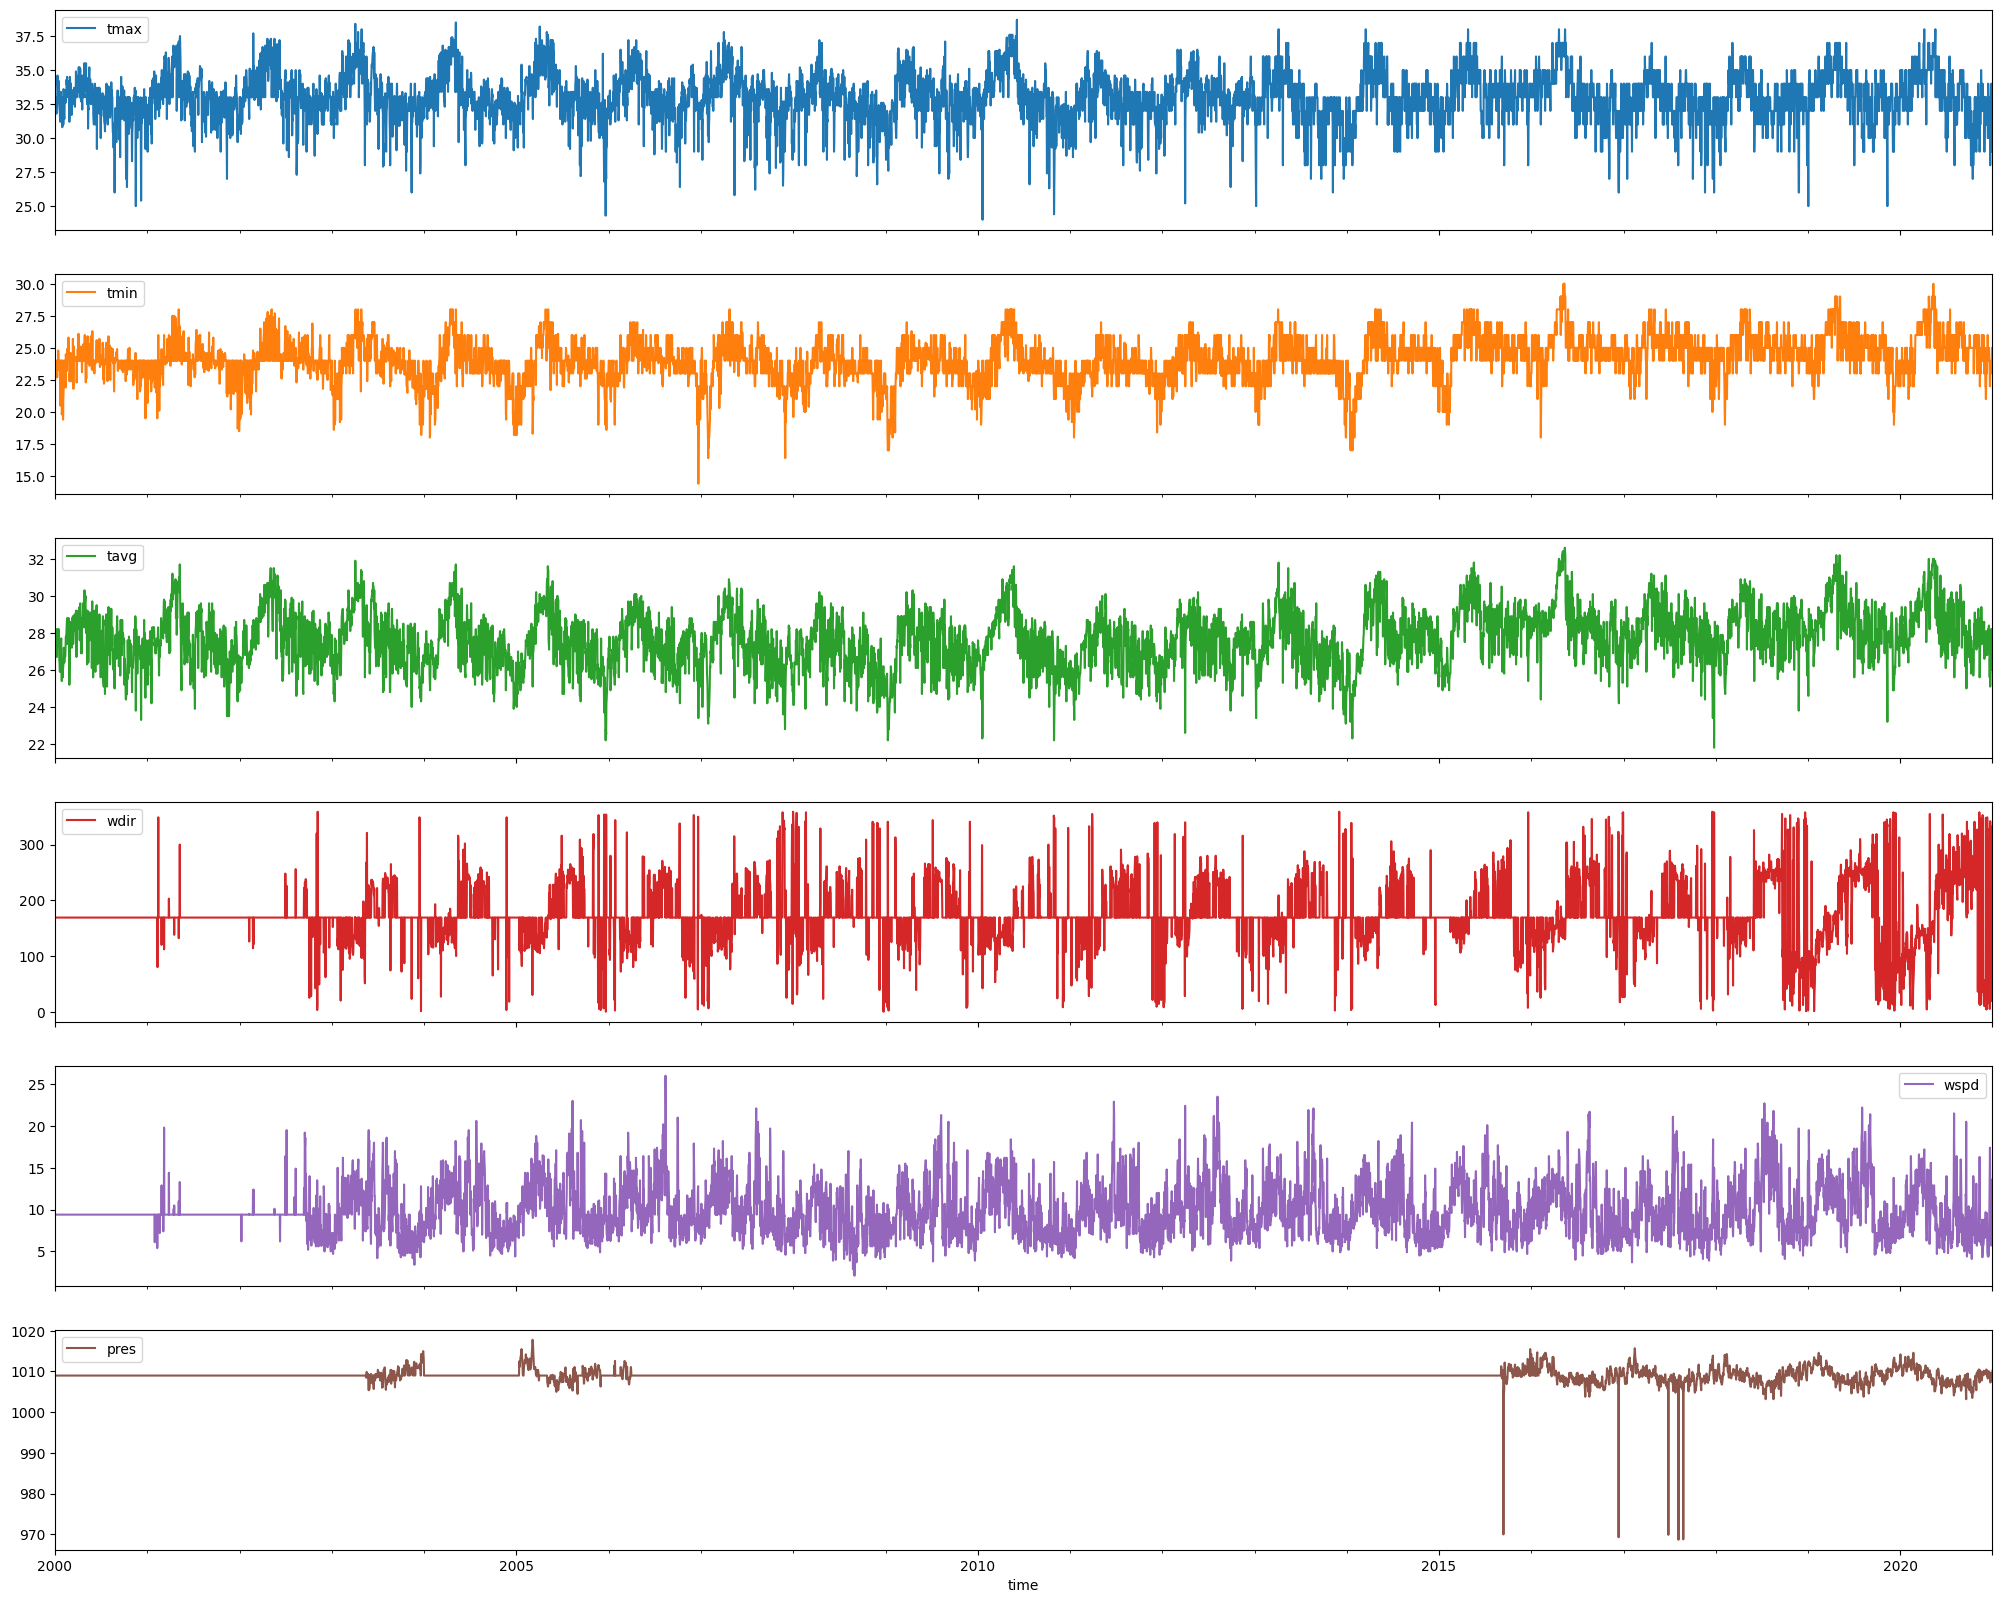

In [107]:
weather_data.plot(subplots=True, figsize=(25,20))

array([<Axes: xlabel='time'>, <Axes: xlabel='time'>,
       <Axes: xlabel='time'>, <Axes: xlabel='time'>,
       <Axes: xlabel='time'>, <Axes: xlabel='time'>], dtype=object)

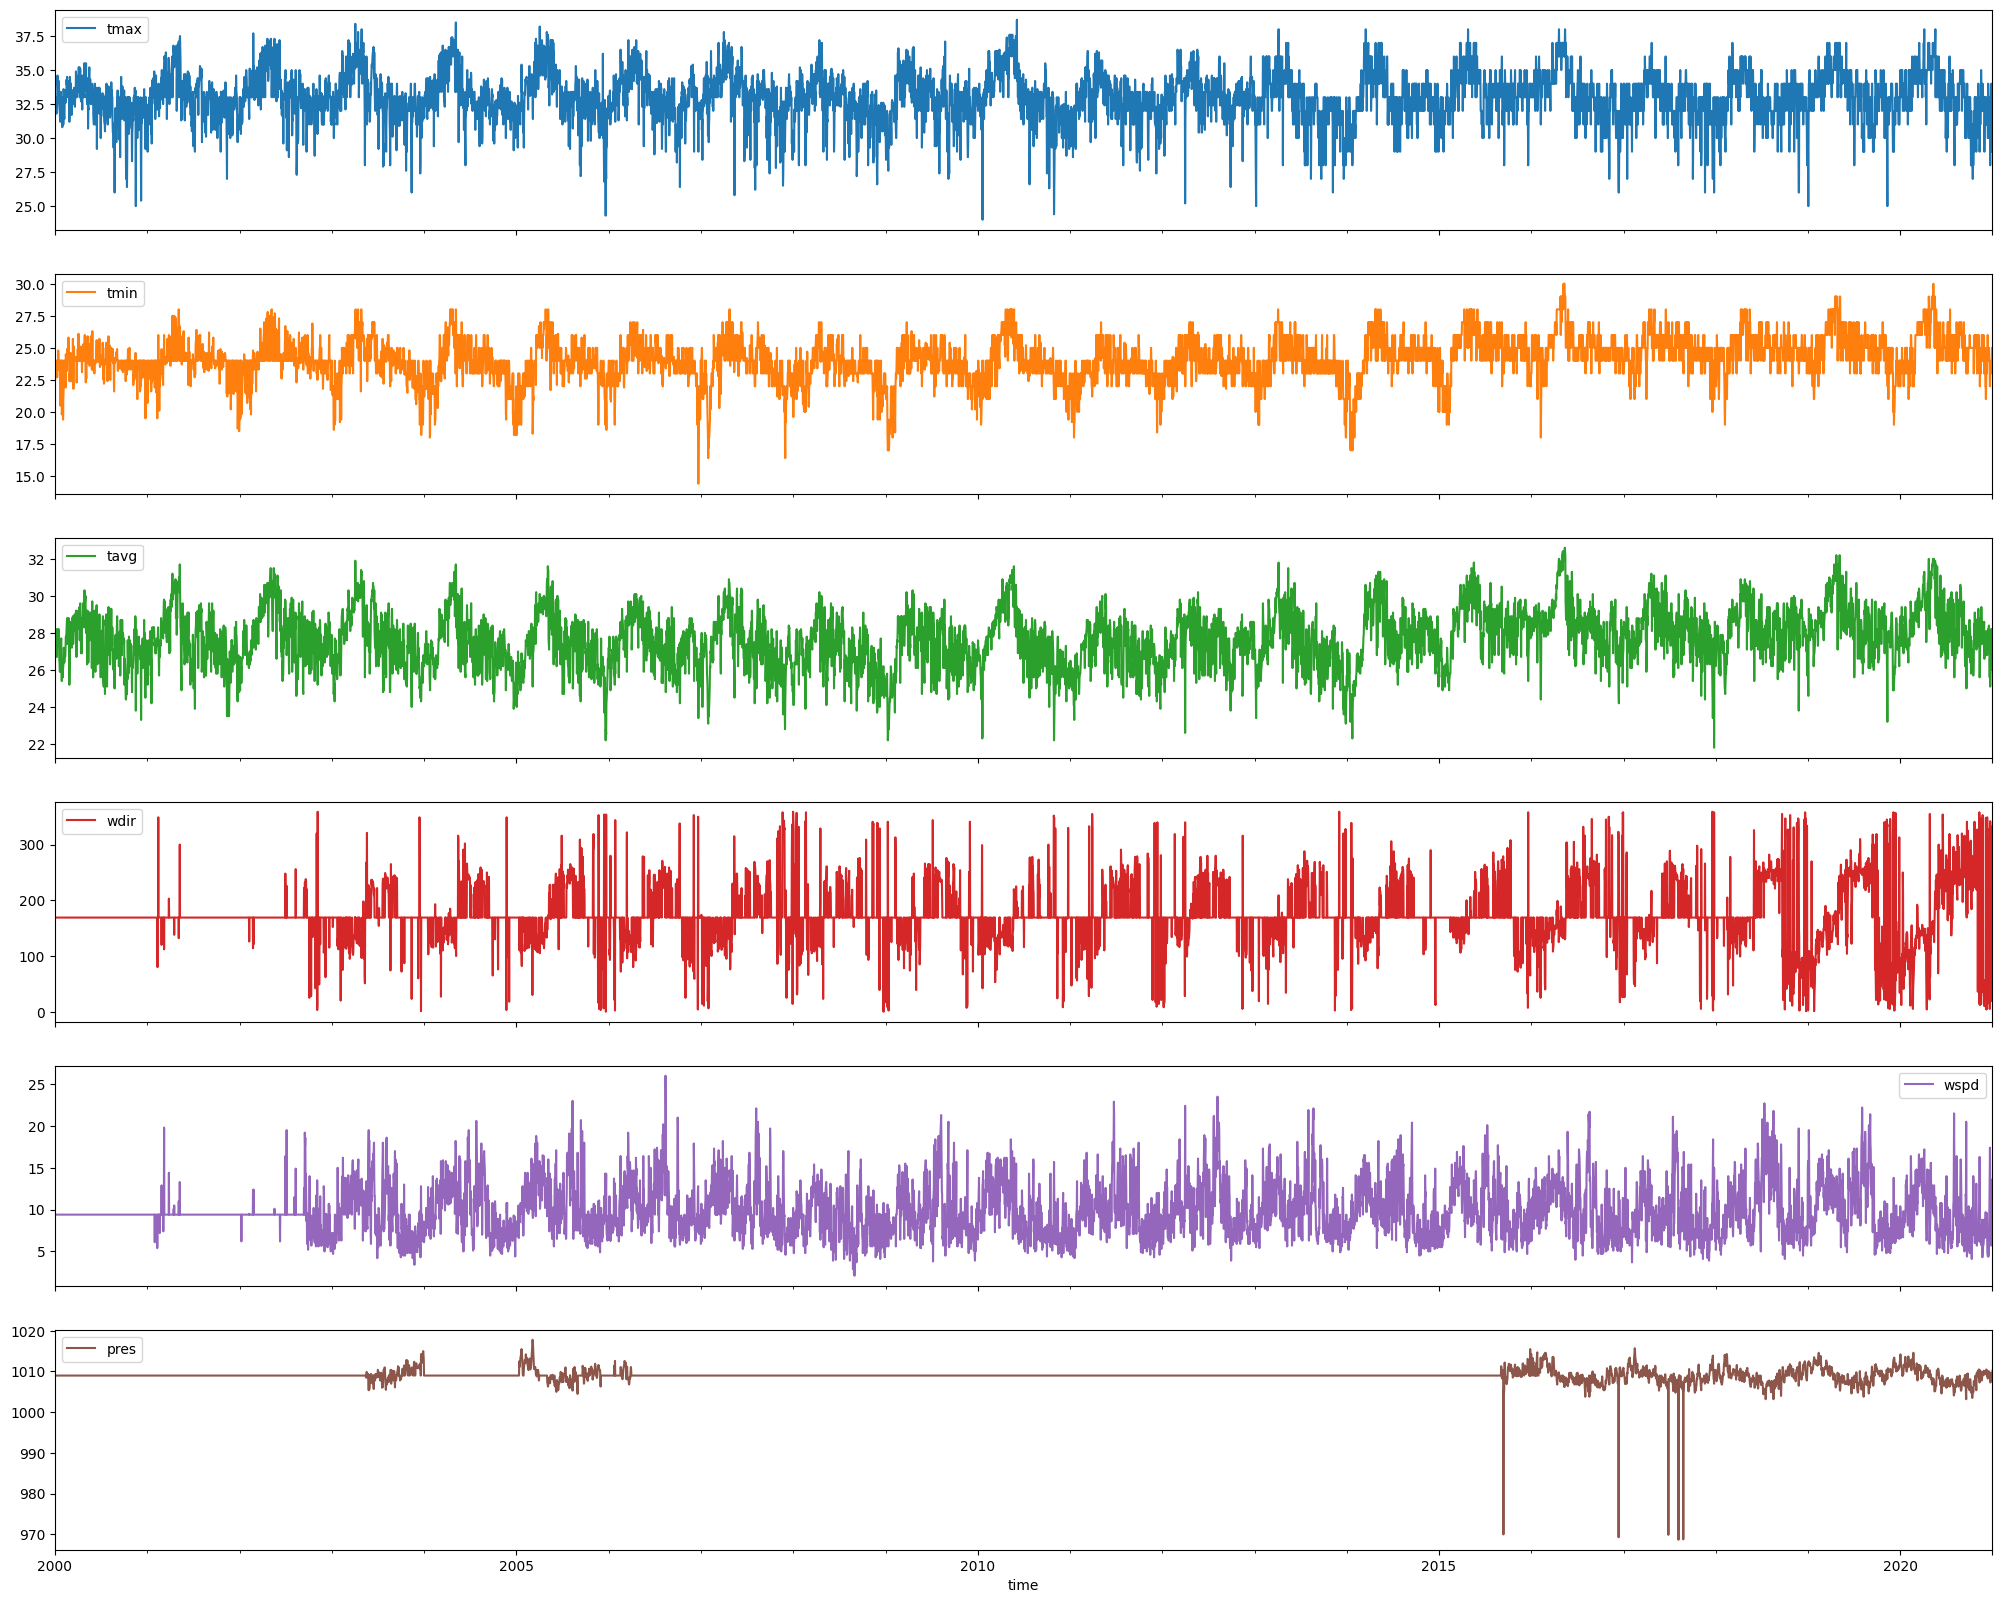

In [108]:
weather_data['2000':'2020'].resample('D').fillna(method='pad').plot(subplots=True, figsize=(25,20))
     

array([[<Axes: title={'center': 'tmax'}>,
        <Axes: title={'center': 'tmin'}>],
       [<Axes: title={'center': 'tavg'}>,
        <Axes: title={'center': 'wdir'}>],
       [<Axes: title={'center': 'wspd'}>,
        <Axes: title={'center': 'pres'}>]], dtype=object)

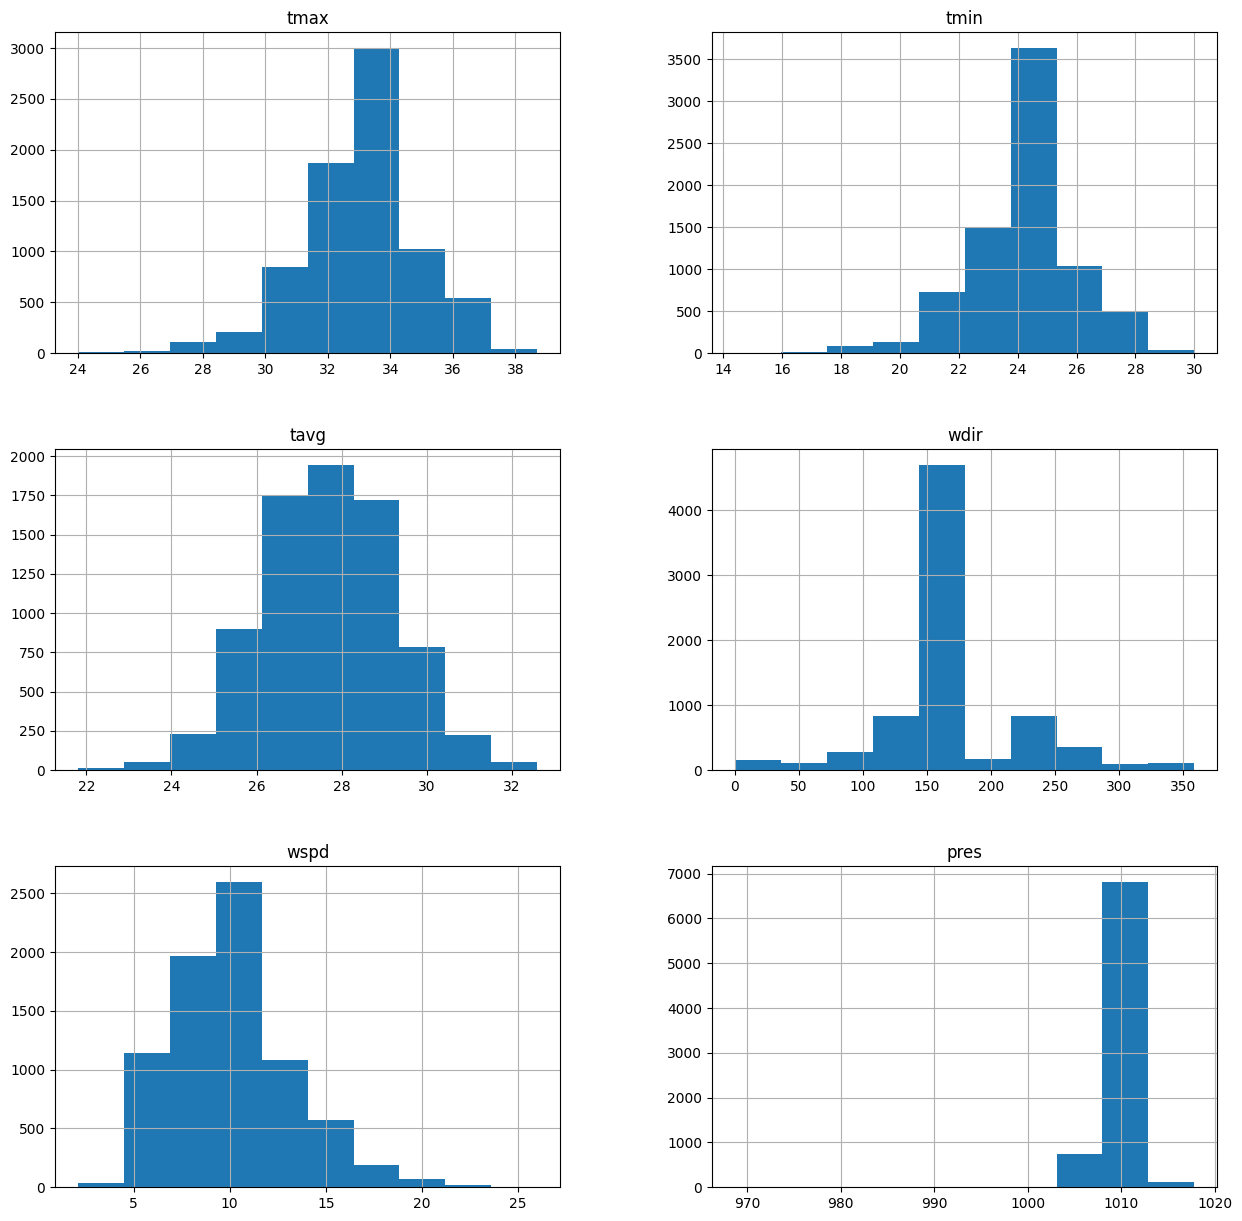

In [109]:
weather_data.hist(bins=10, figsize=(15,15))

In [110]:
weth = weather_data['2000':'2020']
weth.head()

,tmax,tmin,tavg,wdir,wspd,pres
time,,,,,,
2000-01-01,32.8,22.4,26.6,169.0,9.4,1009.0
2000-01-02,32.9,22.6,27.2,169.0,9.4,1009.0
2000-01-03,32.6,22.7,27.8,169.0,9.4,1009.0
2000-01-04,33.0,23.7,27.1,169.0,9.4,1009.0
2000-01-05,32.7,23.6,28.2,169.0,9.4,1009.0


In [111]:
train_y = weather_data.pop("tavg")
train_x = weather_data 

In [113]:
train_X, test_X, train_Y, test_Y = train_test_split(train_x, train_y, test_size=0.2, random_state=4)

In [114]:
train_X.shape

(6136, 5)

In [115]:
train_Y.shape

(6136,)

In [116]:
train_Y.head(10)

time
2009-05-04    27.2
2001-05-24    28.5
2008-07-30    26.7
2012-03-10    28.8
2007-09-25    27.2
2009-10-27    26.5
2005-04-23    29.7
2001-06-02    27.8
2008-04-15    29.1
2018-08-01    29.4
Name: tavg, dtype: float64

Multiple Linear Regression

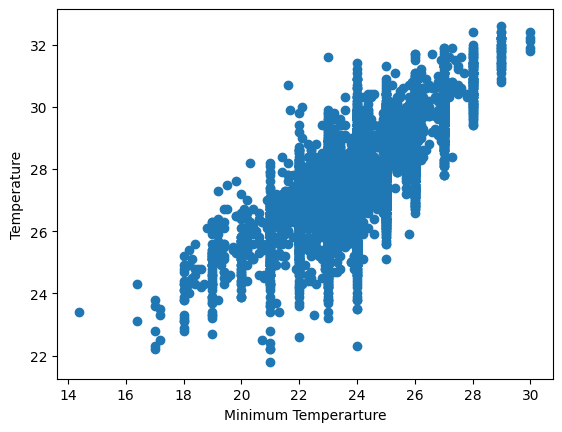

In [117]:
plt.scatter(weth.tmin, weth.tavg)
plt.xlabel('Minimum Temperarture')
plt.ylabel('Temperature')
plt.show()

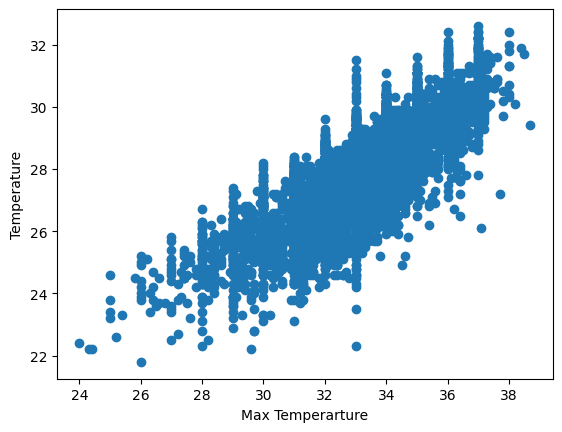

In [118]:
plt.scatter(weth.tmax, weth.tavg)
plt.xlabel('Max Temperarture')
plt.ylabel('Temperature')
plt.show()

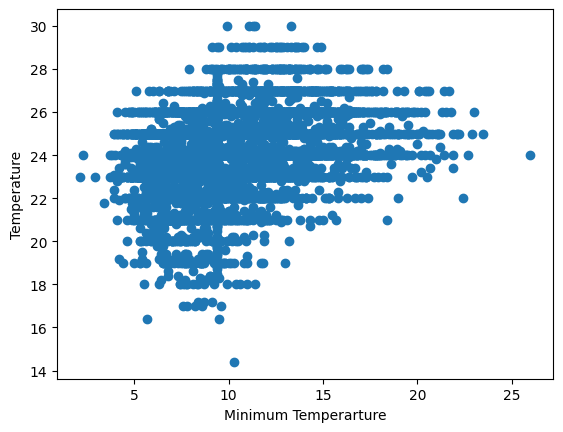

In [119]:
plt.scatter(weth.wspd, weth.tmin)
plt.xlabel('Minimum Temperarture')
plt.ylabel('Temperature')
plt.show()

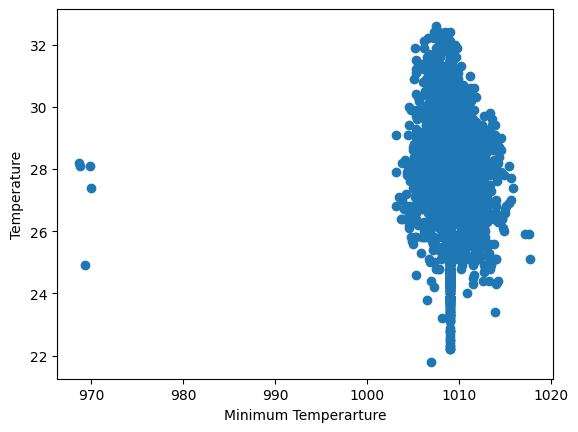

In [120]:
plt.scatter(weth.pres, weth.tavg)
plt.xlabel('Minimum Temperarture')
plt.ylabel('Temperature')
plt.show()

In [121]:
model = LinearRegression()
model.fit(train_X, train_Y)

LinearRegression()

In [122]:
prediction = model.predict(test_X)

In [123]:
np.mean(np.absolute(prediction-test_Y))

0.5576943175495361

In [124]:
print('Variance score: %.2f' % model.score(test_X, test_Y))

Variance score: 0.78


In [125]:
for i in  range(len(prediction)):
    prediction[i]= round(prediction[i], 2)
pd.DataFrame({'Actual': test_Y, 'Predicton': prediction, 'diff':(test_Y-prediction)})

,Actual,Predicton,diff
time,,,
2006-05-04,29.8,28.90,0.90
2013-02-10,26.9,26.81,0.09
2015-04-10,30.4,30.35,0.05
2015-06-10,30.1,29.87,0.23
2003-02-03,26.1,25.87,0.23
...,...,...,...
2018-01-20,27.9,27.61,0.29
2015-09-19,27.9,28.58,-0.68
2011-06-04,28.4,28.54,-0.14


Decision Tree Regression

In [126]:

from sklearn.tree import DecisionTreeRegressor
regressor=DecisionTreeRegressor(random_state=0)
regressor.fit(train_X,train_Y)

DecisionTreeRegressor(random_state=0)

In [127]:
prediction2=regressor.predict(test_X)
np.mean(np.absolute(prediction2-test_Y))

0.7194544613909435

In [128]:
print('Variance score: %.2f' % regressor.score(test_X, test_Y))

Variance score: 0.65


In [129]:
for i in range(len(prediction2)):
  prediction2[i]=round(prediction2[i],2)
pd.DataFrame({'Actual':test_Y,'Prediction':prediction2,'diff':(test_Y-prediction2)})

,Actual,Prediction,diff
time,,,
2006-05-04,29.8,29.60,0.20
2013-02-10,26.9,28.20,-1.30
2015-04-10,30.4,30.10,0.30
2015-06-10,30.1,30.00,0.10
2003-02-03,26.1,25.90,0.20
...,...,...,...
2018-01-20,27.9,27.40,0.50
2015-09-19,27.9,29.10,-1.20
2011-06-04,28.4,27.60,0.80


Random Forest Regression


In [130]:

from sklearn.ensemble import RandomForestRegressor
regr=RandomForestRegressor(max_depth=90,random_state=0,n_estimators=100)
regr.fit(train_X,train_Y)

RandomForestRegressor(max_depth=90, random_state=0)

In [131]:
prediction3=regr.predict(test_X)
np.mean(np.absolute(prediction3-test_Y))
     

0.5667163592777067

In [132]:

print('Variance score: %.2f' % regr.score(test_X, test_Y))

Variance score: 0.77


In [133]:
for i in range(len(prediction3)):
  prediction3[i]=round(prediction3[i],2)
pd.DataFrame({'Actual':test_Y,'Prediction':prediction3,'diff':(test_Y-prediction3)})
     

,Actual,Prediction,diff
time,,,
2006-05-04,29.8,29.18,0.62
2013-02-10,26.9,26.81,0.09
2015-04-10,30.4,29.96,0.44
2015-06-10,30.1,29.79,0.31
2003-02-03,26.1,25.84,0.26
...,...,...,...
2018-01-20,27.9,27.63,0.27
2015-09-19,27.9,29.02,-1.12
2011-06-04,28.4,28.55,-0.15


In [134]:
from sklearn.metrics import r2_score

Calculating R2-score for Multiple Linear Regression

In [135]:
print("Mean absolute error: %.2f" % np.mean(np.absolute(prediction - test_Y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((prediction - test_Y) ** 2))
print("R2-score: %.2f" % r2_score(test_Y,prediction ) )
     

Mean absolute error: 0.56
Residual sum of squares (MSE): 0.50
R2-score: 0.78


Calculating R2-score for Decision Tree Regression

In [136]:
print("Mean absolute error: %.2f" % np.mean(np.absolute(prediction2 - test_Y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((prediction2 - test_Y) ** 2))
print("R2-score: %.2f" % r2_score(test_Y,prediction2 ) )

Mean absolute error: 0.72
Residual sum of squares (MSE): 0.81
R2-score: 0.65


Calculating R2-score for Random Forest Regression

In [137]:
print("Mean absolute error: %.2f" % np.mean(np.absolute(prediction3 - test_Y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((prediction2 - test_Y) ** 2))
print("R2-score: %.2f" % r2_score(test_Y,prediction3 ) )

Mean absolute error: 0.57
Residual sum of squares (MSE): 0.81
R2-score: 0.77
